# 1. 数据预处理/划分数据集

In [1]:
import pandas as pd 
import random
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 从excel导入待训练的数据
BIS0_df = pd.read_excel("B0.xlsx", header=None) #无输入时的荧光信号上升
BIS1_df = pd.read_excel("B1.xlsx", header=None) #输入1(SA)
BIS2_df = pd.read_excel("B2.xlsx", header=None) #输入2(KP)
BIS3_df = pd.read_excel("B3.xlsx", header=None) #输入1(SA)+2(KP)
BIS4_df = pd.read_excel("B4.xlsx", header=None) #输入4(AB)
BIS5_df = pd.read_excel("B5.xlsx", header=None) #输入1(SA)+4(AB)
BIS6_df = pd.read_excel("B6.xlsx", header=None) #输入2(KP)+4(AB)
BIS7_df = pd.read_excel("B7.xlsx", header=None) #输入1(SA)+2(KP)+4(AB)

BIS0_data, BIS1_data, BIS2_data, BIS3_data, BIS4_data, BIS5_data, BIS6_data, BIS7_data = [], [], [], [], [], [], [], []

# 用于训练的数据个数
train_n = 300

for i in range(train_n):
    BIS0_data.append(BIS0_df.iloc[:, i])

for i in range(train_n):
    BIS1_data.append(BIS1_df.iloc[:, i])

for i in range(train_n):
    BIS2_data.append(BIS2_df.iloc[:, i])

for i in range(train_n):
    BIS3_data.append(BIS3_df.iloc[:, i])

for i in range(train_n):
    BIS4_data.append(BIS4_df.iloc[:, i])

for i in range(train_n):
    BIS5_data.append(BIS5_df.iloc[:, i])

for i in range(train_n):
    BIS6_data.append(BIS6_df.iloc[:, i])

for i in range(train_n):
    BIS7_data.append(BIS7_df.iloc[:, i])

print("BIS0数据：",len(BIS0_data))
print("BIS1数据：",len(BIS1_data))
print("BIS2数据：",len(BIS2_data))
print("BIS3数据：",len(BIS3_data))
print("BIS4数据：",len(BIS4_data))
print("BIS5数据：",len(BIS5_data))
print("BIS6数据：",len(BIS6_data))
print("BIS7数据：",len(BIS7_data))
print("数据维度：",len(list(BIS0_data[0])), len(list(BIS1_data[0])), len(list(BIS2_data[0])), len(list(BIS3_data[0])), len(list(BIS4_data[0])), len(list(BIS5_data[0])), len(list(BIS6_data[0])), len(list(BIS7_data[0])))

train_data = []
train_label = []
test_data = []
test_label = []

for i in range(0,len(BIS0_data)):
    train_data.append(list(BIS0_data[i]))
    train_label.append(0)

for i in range(0,len(BIS1_data)):
    train_data.append(list(BIS1_data[i]))
    train_label.append(1)

for i in range(0,len(BIS2_data)):
    train_data.append(list(BIS2_data[i]))
    train_label.append(2)

for i in range(0,len(BIS3_data)):
    train_data.append(list(BIS3_data[i]))
    train_label.append(3)

for i in range(0,len(BIS4_data)):
    train_data.append(list(BIS4_data[i]))
    train_label.append(4)

for i in range(0,len(BIS5_data)):
    train_data.append(list(BIS5_data[i]))
    train_label.append(5)

for i in range(0,len(BIS6_data)):
    train_data.append(list(BIS6_data[i]))
    train_label.append(6)

for i in range(0,len(BIS7_data)):
    train_data.append(list(BIS7_data[i]))
    train_label.append(7)

print("训练数据:",len(train_data),train_data)
print("测试数据:",len(test_data),test_data)


BIS0数据： 300
BIS1数据： 300
BIS2数据： 300
BIS3数据： 300
BIS4数据： 300
BIS5数据： 300
BIS6数据： 300
BIS7数据： 300
数据维度： 1 1 1 1 1 1 1 1
训练数据: 2400 [[0.4670690000000002], [0.4780119999999999], [0.43543599999999993], [0.398309], [0.4005210000000001], [0.43244800000000017], [0.36577099999999985], [0.3868029999999998], [0.3890589999999998], [0.446928], [0.4372109999999998], [0.4212450000000001], [0.433025], [0.41399200000000014], [0.3869199999999997], [0.38475799999999993], [0.3892040000000001], [0.4297519999999999], [0.45845999999999987], [0.3920419999999998], [0.4266430000000001], [0.4375760000000002], [0.40431799999999973], [0.4040259999999998], [0.3907100000000001], [0.39375799999999983], [0.3825909999999999], [0.4754820000000002], [0.44988300000000003], [0.426083], [0.45986300000000013], [0.4003399999999997], [0.45782199999999995], [0.46868699999999985], [0.474588], [0.43249099999999996], [0.411694], [0.46866700000000017], [0.44984500000000005], [0.38194899999999987], [0.3880969999999999], [0.486570000

# 2. 数据集拆/RF模型训练/网格搜索最优参数/cv=5

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# 将数据分割为训练集和测试集
train_data, test_data, train_label, test_label = train_test_split(train_data, train_label, test_size=0.3, random_state=23)

# 检查训练数据的第一个数据样本的特征数量
feature_count_train = len(train_data[0])

# 检查测试数据的第一个数据样本的特征数量
feature_count_test = len(test_data[0])

print("训练数据的特征数量:", feature_count_train)
print("测试数据的特征数量:", feature_count_test)

print("训练数据:",len(train_data),train_data)
print("测试数据:",len(test_data),test_data)


训练数据的特征数量: 1
测试数据的特征数量: 1
训练数据: 1680 [[0.4581440000000001], [35.433293], [27.65304], [35.340523], [3.70835], [4.323238], [0.3618349999999999], [35.161707], [47.456294], [3.8030260000000005], [16.055103000000003], [34.855157], [27.673238], [47.53299], [0.3825909999999999], [0.4197520000000001], [15.245385], [3.674197], [4.204079], [4.337688], [9.796892], [10.507946], [14.484865000000001], [33.999866], [47.47351], [46.019564], [47.674033], [0.4185860000000001], [27.279401], [15.578383000000002], [34.124455999999995], [35.199373], [8.550911], [46.1537], [9.727252], [46.471964], [34.053613], [15.201755], [10.600586], [34.266856], [56.838616], [0.44382999999999995], [14.466935000000001], [10.556236], [0.3882730000000001], [57.41572], [8.637141], [46.85993], [14.562255000000002], [0.3768119999999999], [15.607173], [0.45078300000000016], [56.200476], [27.763588000000002], [27.167251], [0.4409430000000001], [46.760674], [27.78507], [34.724593], [27.40383], [62.900434], [27.277691], [8.701141],

# 3. 创建RF分类模型

In [3]:

from sklearn.ensemble import RandomForestClassifier

# 创建随机森林分类器
rf = RandomForestClassifier(random_state=23)

# 定义要搜索的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],           #决策树的数量
    'max_depth': [None],                       #最大树深度
    'min_samples_split': [2, 5, 10],           #节点分裂所需的最小样本数
    'min_samples_leaf': [1, 2, 4],             #叶子节点所需的最小样本数
    'max_features': ['sqrt'],                  #每个节点分裂时考虑的最大特征数
    'bootstrap': [True],                       #是否使用自助采样
    'criterion': ['gini', 'entropy'],          #分裂标准
    'class_weight': [None],                    #类别权重
    'random_state': [23]                       #随机种子
}

# 定义要搜索的参数网格
#param_grid = {
#    'n_estimators': [100, 200, 300],           #决策树的数量
#    'max_depth': [None, 10, 20, 30],           #最大树深度
#    'min_samples_split': [2, 5, 10],           #节点分裂所需的最小样本数
#    'min_samples_leaf': [1, 2, 4],             #叶子节点所需的最小样本数
#    'max_features': ['auto', 'sqrt', 'log2'],  #每个节点分裂时考虑的最大特征数
#    'bootstrap': [True, False],                #是否使用自助采样
#    'criterion': ['gini', 'entropy'],          #分裂标准
#    'class_weight': [None, 'balanced'],        #类别权重
#    'random_state': [22]                       #随机种子
#}
# Best Parameters: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 22}

# 创建网格搜索对象，使用5折交叉验证评估每个参数组合的性能
grid_search = GridSearchCV(rf, param_grid, cv=5)

# 在整个训练集上进行网格搜索和交叉验证
grid_search.fit(train_data, train_label)

# 输出最佳参数组合
print("Best Parameters:", grid_search.best_params_)

# 使用最佳参数进行训练
best_rf = grid_search.best_estimator_

# 在测试集上进行预测
test_score = best_rf.predict_proba(test_data)

# 在训练集上进行预测
train_predictions = best_rf.predict(train_data)

# 在训练集上进行交叉验证
cv_scores = cross_val_score(rf, train_data, train_label, cv=5)

# 打印交叉验证的准确率
print("Cross-Validation Accuracy:", cv_scores.mean())
print("Cross-Validation Accuracy:", cv_scores)


Best Parameters: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 23}
Cross-Validation Accuracy: 1.0
Cross-Validation Accuracy: [1. 1. 1. 1. 1.]


# 4. 打印每一个样本的张量、真实标签和预测标签

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 打印每一个样本的张量、真实标签和预测标签
for i in range(len(test_data)):
    test_predictions = best_rf.predict(test_data)
    sample_tensor = test_data[i]
    true_label = test_label[i]
    predicted_label = test_predictions[i]
    print("Sample Tensor:", sample_tensor)
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)


Sample Tensor: [62.430844]
True Label: 7
Predicted Label: 7
Sample Tensor: [46.813644]
True Label: 6
Predicted Label: 6
Sample Tensor: [8.713511]
True Label: 2
Predicted Label: 2
Sample Tensor: [47.84144]
True Label: 6
Predicted Label: 6
Sample Tensor: [35.173697]
True Label: 5
Predicted Label: 5
Sample Tensor: [57.52681]
True Label: 7
Predicted Label: 7
Sample Tensor: [9.970722]
True Label: 2
Predicted Label: 2
Sample Tensor: [9.692382]
True Label: 2
Predicted Label: 2
Sample Tensor: [4.416418999999999]
True Label: 1
Predicted Label: 1
Sample Tensor: [46.20689]
True Label: 6
Predicted Label: 6
Sample Tensor: [58.084689999999995]
True Label: 7
Predicted Label: 7
Sample Tensor: [0.42783800000000016]
True Label: 0
Predicted Label: 0
Sample Tensor: [47.29345]
True Label: 6
Predicted Label: 6
Sample Tensor: [27.362391]
True Label: 4
Predicted Label: 4
Sample Tensor: [10.028632]
True Label: 2
Predicted Label: 2
Sample Tensor: [0.4500759999999999]
True Label: 0
Predicted Label: 0
Sample Tens

# 5. 打印报告/绘制数据图

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      1.00      1.00       210
           2       1.00      1.00      1.00       220
           3       1.00      1.00      1.00       204
           4       1.00      1.00      1.00       211
           5       1.00      1.00      1.00       206
           6       1.00      1.00      1.00       205
           7       1.00      1.00      1.00       209

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680

训练集混淆矩阵:
[[215   0   0   0   0   0   0   0]
 [  0 210   0   0   0   0   0   0]
 [  0   0 220   0   0   0   0   0]
 [  0   0   0 204   0   0   0   0]
 [  0   0   0   0 211   0   0   0]
 [  0   0   0   0   0 206   0   0]
 [  0   0   0   0   0   0 205   0]
 [  0   0   0   0   0   0   0 209]]


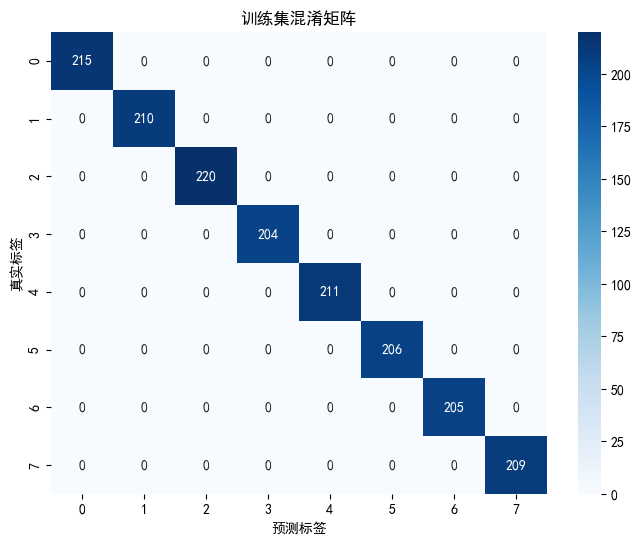

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00        80
           3       1.00      1.00      1.00        96
           4       1.00      1.00      1.00        89
           5       1.00      1.00      1.00        94
           6       1.00      1.00      1.00        95
           7       1.00      1.00      1.00        91

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720

测试集准确率: 1.0
测试集精确率: 1.0
测试集召回率: 1.0
测试集F1值: 1.0
测试集混淆矩阵:
[[85  0  0  0  0  0  0  0]
 [ 0 90  0  0  0  0  0  0]
 [ 0  0 80  0  0  0  0  0]
 [ 0  0  0 96  0  0  0  0]
 [ 0  0  0  0 89  0  0  0]
 [ 0  0  0  0  0 94  0  0]
 [ 0  0  0  0  0  0 95  0]
 [ 0  0  0  0  0  0  0 91]]


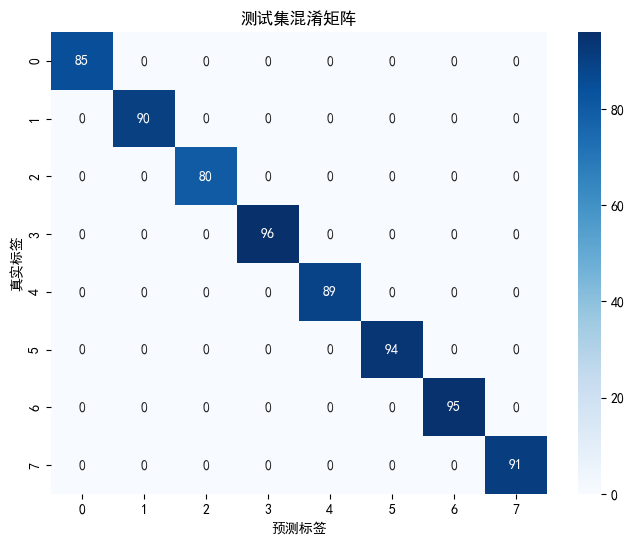

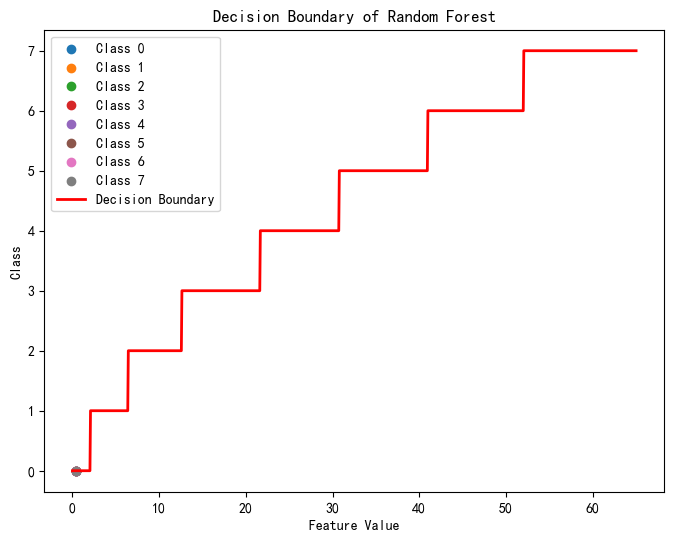

每个类别的决策数量： [32, 67, 95, 139, 140, 157, 170, 200]


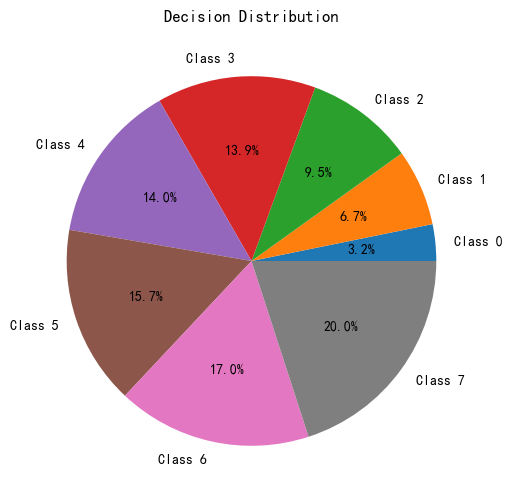

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 打印训练集的分类报告
train_report = classification_report(train_label, train_predictions)
print("Train Classification Report:")
print(train_report)

# 计算混淆矩阵
train_confu_mat = confusion_matrix(train_label, train_predictions)
print("训练集混淆矩阵:")
print(train_confu_mat)

# 绘制混淆矩阵热图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8, 6))
sns.heatmap(train_confu_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("训练集混淆矩阵")
plt.show()

##############################################################

# 对测试集上进行分类预测
test_predictions = best_rf.predict(test_data)

# 打印测试集的分类报告
test_report = classification_report(test_label, test_predictions)
print("Test Classification Report:")
print(test_report)

# 计算准确率
accuracy = accuracy_score(test_label, test_predictions)
print("测试集准确率:", accuracy)

# 计算精确率
precision = precision_score(test_label, test_predictions, average='macro')
print("测试集精确率:", precision)

# 计算召回率
recall = recall_score(test_label, test_predictions, average='macro')
print("测试集召回率:", recall)

# 计算F1值
f1 = f1_score(test_label, test_predictions, average='macro')
print("测试集F1值:", f1)

# 计算混淆矩阵
test_confu_mat = confusion_matrix(test_label, test_predictions)
print("测试集混淆矩阵:")
print(test_confu_mat)

# 绘制混淆矩阵热图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8, 6))
sns.heatmap(test_confu_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("测试集混淆矩阵")
plt.show()

####################################################################

# 绘制训练集决策边界图
X = train_data   # 特征数据
y = train_label  # 标签数据

# 指定保存路径和文件名
export_file = 'D:/Zz/Machine Learning/Multi-classification/bacterial identification/decision_boundary_data.csv'

# 定义绘制决策边界的函数
def plot_decision_boundary(X, y, best_rf, ax, export_file = None):
    xx = np.linspace(0, 65, 1000)
    yy = best_rf.predict(xx.reshape(-1, 1))
    for i in range(8):
        ax.scatter(X[y == i], y[y == i], label=f'Class {i}')

    # 保存决策边界数据到文件
    if export_file:
        decision_boundary_data = np.column_stack((xx, yy))
        np.savetxt(export_file, decision_boundary_data, delimiter=',', header='Feature,Class', comments='')
    
    ax.plot(xx, yy, color='r', lw=2, label='Decision Boundary')
    ax.legend()

# 绘制决策边界图
plt.figure(figsize=(8, 6))
plot_decision_boundary(X, y, best_rf, plt, export_file)
plt.title("Decision Boundary of Random Forest")
plt.xlabel("Feature Value")
plt.ylabel("Class")
plt.show()

# 定义绘制决策内容饼状图的函数
def plot_decision_pie(X, y, model):
    xx = np.linspace(0, 65, 1000)
    yy = model.predict(xx.reshape(-1, 1))
    
    # 统计每个类别的决策数量
    decision_counts = [np.sum(yy == i) for i in range(8)]
    print('每个类别的决策数量：', decision_counts)
    # 类别标签
    class_labels = [f'Class {i}' for i in range(8)]
    
    # 绘制饼状图
    plt.figure(figsize=(8, 6))
    plt.pie(decision_counts, labels=class_labels, autopct='%1.1f%%')
    plt.title("Decision Distribution")
    plt.show()

# 绘制决策内容饼状图
plot_decision_pie(X, y, best_rf)


# 6. 真实样本预处理

In [6]:
import pandas as pd

# 读取 Excel 文件
sample_df = pd.read_excel('Bacterial Samples.xlsx', header=None)

# 获取第2行和第361行数据
initial_value = sample_df.iloc[1]  # 第2行，第1行是样本名称
final_value = sample_df.iloc[360]  # 第361行(30 min)

# 进行数据处理，第361行的数据减去第2行的数据
deltaF = final_value - initial_value

# 输入样本数量
sample_n = 25

sample_data = []
sample_label = []

# 添加样本真实标签（与样本数量一致）
labels = [0, 1, 2, 4, 1, 5, 3, 4, 5, 4, 1, 3, 6, 4, 3, 5, 2, 1, 4, 3, 0, 1, 7, 7, 7]

for i in range(sample_n):
    sample_data.append(deltaF.iloc[i])
    sample_label.append(labels[i])

print(sample_data)


[1.3221600000000002, 4.7422439999999995, 10.664459, 26.665303, 3.338979, 40.431795, 20.937151999999998, 28.745519, 38.254295000000006, 28.569570000000002, 5.6275423333333325, 13.78732733333333, 51.855541666666674, 27.032950333333332, 18.985135, 39.818064333333325, 12.517989, 5.401149, 27.504863999999998, 13.056190333333333, 1.765649544576611, 3.790876976502977, 54.441569, 55.290208, 49.927075]


# 7. 使用训练好的RF模型对真实样本数据进行分类

Sample Tensor: [1.32216]
True Label: 0
Predicted Label: 0
Sample Tensor: [4.742244]
True Label: 1
Predicted Label: 1
Sample Tensor: [10.664459]
True Label: 2
Predicted Label: 2
Sample Tensor: [26.665303]
True Label: 4
Predicted Label: 4
Sample Tensor: [3.338979]
True Label: 1
Predicted Label: 1
Sample Tensor: [40.431795]
True Label: 5
Predicted Label: 5
Sample Tensor: [20.937152]
True Label: 3
Predicted Label: 3
Sample Tensor: [28.745519]
True Label: 4
Predicted Label: 4
Sample Tensor: [38.254295]
True Label: 5
Predicted Label: 5
Sample Tensor: [28.56957]
True Label: 4
Predicted Label: 4
Sample Tensor: [5.62754233]
True Label: 1
Predicted Label: 1
Sample Tensor: [13.78732733]
True Label: 3
Predicted Label: 3
Sample Tensor: [51.85554167]
True Label: 6
Predicted Label: 6
Sample Tensor: [27.03295033]
True Label: 4
Predicted Label: 4
Sample Tensor: [18.985135]
True Label: 3
Predicted Label: 3
Sample Tensor: [39.81806433]
True Label: 5
Predicted Label: 5
Sample Tensor: [12.517989]
True Labe

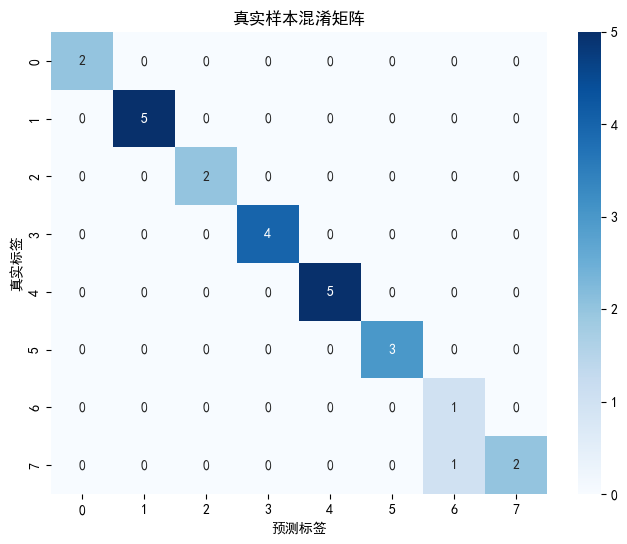

In [7]:
import numpy as np
sample_data_array = np.array(sample_data)
reshaped_data = sample_data_array.reshape(sample_n,1)
#print(reshaped_data)

sample_predictions = best_rf.predict(reshaped_data)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 打印每一个样本的张量、真实标签和预测标签
for i in range(len(reshaped_data)):
    sample_predictions = best_rf.predict(reshaped_data)
    sample_tensor = reshaped_data[i]
    true_label = sample_label[i]
    predicted_label = sample_predictions[i]
    print("Sample Tensor:", sample_tensor)
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)

# 打印真实样本的分类报告
sample_report = classification_report(sample_label, sample_predictions)
print("Samples Classification Report:")
print(sample_report)

# 计算准确率
accuracy = accuracy_score(sample_label, sample_predictions)
print("真实样本准确率:", accuracy)

# 计算精确率
precision = precision_score(sample_label, sample_predictions, average='macro')
print("真实样本精确率:", precision)

# 计算召回率
recall = recall_score(sample_label, sample_predictions, average='macro')
print("真实样本召回率:", recall)

# 计算F1值
f1 = f1_score(sample_label, sample_predictions, average='macro')
print("真实样本F1值:", f1)

# 计算混淆矩阵
sample_confu_mat = confusion_matrix(sample_label, sample_predictions)
print("测试集混淆矩阵:")
print(sample_confu_mat)

# 绘制混淆矩阵热图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8, 6))
sns.heatmap(sample_confu_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("真实样本混淆矩阵")
plt.show()
